In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

# Criar as DataFrames com os colocados e não colocados
### Também criei DataFrames para cada tabela na pagina (Numero de vagas e numero de candidatos para cada mestrado)

In [3]:
def Nº_Ordem(T):

    if len(T.columns) < 2:

        lista_int = np.arange( len(T) )+1
        list_string  = map(str, lista_int) 
        lista_numero = list(list_string)


        for i in range(len(lista_numero)):
            lista_numero[i] = lista_numero[i] + 'º'

        T['Nº de ordem'] = lista_numero
        T = T[['Nº de ordem','Nomes dos candidatos' ]]
    return T

In [4]:
def Nº_Ordem_2(T):

    if len(T.columns) < 3:

        lista_int = np.arange( len(T) )+1+len(dfs[2]) ## ------------------------
        list_string  = map(str, lista_int) 
        lista_numero = list(list_string)


        for i in range(len(lista_numero)):
            lista_numero[i] = lista_numero[i] + 'º'

        T['Nº de ordem'] = lista_numero
        T = T[['Nº de ordem','Nomes dos candidatos' ]]
    return T

In [9]:
#Criar lista de Mestrados
Mestrados_FCUP = ['Aplicações_em_Biotecnologia_e_Biologia_Sintética','Arquitetura_Paisagista','Astronomia_e_Astrofísica','Avaliação_e_Remediação_de_Solos','Biodiversidade_Genética_e_Evolução', 'Bioinformática_e_Biologia_Computacional', 'Biologia_Celular_e_Molecular', 'Biologia_e_Gestão_da_Qualidade_da_Água', 'Biologia_Funcional_e_Biotecnologia_de_Plantas', 'Bioquímica','Ciência_de_Computadores','Ciência_de_Dados','Ciência_e_Tecnologia_de_Nanomateriais','Ciências_do_Consumo_e_Nutrição','Ciências_e_Tecnologia_do_Ambiente','Deteção_Remota','Ecologia_e_Ambiente','Engenharia_Agronómica','Engenharia_de_Redes_e_Sistemas_Informáticos','Engenharia_de_Viticultura_e_Enologia','Engenharia_Física','Engenharia_Geográfica','Engenharia_Matemática','Ensino_de_Biologia_e_de_Geologia_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Física_e_de_Química_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Matemática_no_3_Ciclo_do_Ensino_Básico_e_no_Secundário','Ensino_e_Divulgação_das_Ciências','Física','Física_Médica','Genética_Forense','Geologia','Matemática','Métodos_Avançados_e_Acreditação_em_Análise_Química','Química','Recursos_Biológicos_Aquáticos','Segurança_Informática','Estatística_Computacional','Estatística_Computacional_e_Análise_de_Dados']
Mestrados_Engenharia = ['Bioengenharia','Ciência_da_Informação','Engenharia_Biomédica','Engenharia_Civil','Engenharia_de_Minas_e_Geo_Ambiente','Engenharia_de_Segurança_e_Higiene_Ocupacionais','Engenharia_de_Serviços_e_Gestão','Engenharia_de_Software','Engenharia_do_Ambiente','Engenharia_e_Ciência_de_Dados', 'Engenharia_e_Gestão_Industrial', 'Engenharia_Eletrotécnica_e_de_Computadores', 'Engenharia_Informática_e_Computação', 'Engenharia_Mecânica', 'Engenharia_Química', 'Estruturas_de_Engenharia_Civil', 'Gestão_da_Mobilidade_Urbana', 'Inovação_e_Empreendedorismo_Tecnológico', 'Mecânica_Computacional', 'Mecânica_dos_Solos_e_Engenharia_Geotécnica', 'Multimédia', 'Planeamento_e_Projecto_Urbano', 'Projeto_Integrado_na_Construção_de_Edifícios', 'Visão_por_Computador']
Mestrados = Mestrados_FCUP + Mestrados_Engenharia
Mestrados.sort()

#Criar DataFrames e Listas vazias para encher com o ciclo for
Colocados_df = pd.DataFrame()
N_Colocados_df = pd.DataFrame()

Colocados_list = []
N_Colocados_list = []

# Este d serve para guardar nomes diferentes para as variáveis no ciclo for
d = {}

for i in Mestrados:
    
    
    # Esta treta guarda a informação HTML que tenho na pasta de Mestrados, como uma lista de dataframes para cada HTML
    rfile  = open(r'./Mestrados//' +i+ '.html',encoding='latin-1')
    rsoup  = BeautifulSoup(rfile, features="lxml")
    soup_string = str(rsoup)

    dfs = pd.read_html(soup_string)
    
    Nº_Ordem(dfs[2])
    
    # Criar df para cada tablea para cada mestrado
    d["df_1_{0}".format(i)] = dfs[1]
    d["df_2_{0}".format(i)] = dfs[2].set_index('Nº de ordem')
    
    # Criar df com os nomes dos colocados em que cada coluna é o mestrado no qual foram colocados
    Colocados_list.append(dfs[2]['Nomes dos candidatos'])    
    Colocados_df = pd.concat([Colocados_df, pd.DataFrame({i : Colocados_list[len(Colocados_list)-1]})], axis=1) 
    
    #Se o numero de vagas for inferior ao numero de candidatos então:
    if dfs[1][1][0] < dfs[1][1][1]:
        
        #dfs[3][['Observações']]
        #dfs[3].drop('Observações', inplace=True, axis=1)
        
        Nº_Ordem_2(dfs[3])
        d["df_3_{0}".format(i)] = dfs[3].set_index('Nº de ordem')
        

        # Criar df com os nomes dos candidatos em que cada coluna é o mestrado no qual não foram colocados
        N_Colocados_list.append(dfs[3]['Nomes dos candidatos'])
        N_Colocados_df = pd.concat([N_Colocados_df, pd.DataFrame({i : N_Colocados_list[len(N_Colocados_list)-1]})], axis=1)

    else:
        N_Colocados_df[i] = np.nan

#Adicionar linhas vazias ao Colocados_df para ter o mesmo tamanho que N_Colocados_df
for i in range(8):
    Colocados_df.loc[Colocados_df.shape[0]] = [np.nan]*len(Mestrados)

# Seleciorar o Mestrado que prentende ver quais pessoas ficaram colocadas também noutro Mestrado e em que mestrado ficaram

In [10]:
Mestrados_FCUP = ['Aplicações_em_Biotecnologia_e_Biologia_Sintética','Arquitetura_Paisagista','Astronomia_e_Astrofísica','Avaliação_e_Remediação_de_Solos','Biodiversidade_Genética_e_Evolução', 'Bioinformática_e_Biologia_Computacional', 'Biologia_Celular_e_Molecular', 'Biologia_e_Gestão_da_Qualidade_da_Água', 'Biologia_Funcional_e_Biotecnologia_de_Plantas', 'Bioquímica','Ciência_de_Computadores','Ciência_de_Dados','Ciência_e_Tecnologia_de_Nanomateriais','Ciências_do_Consumo_e_Nutrição','Ciências_e_Tecnologia_do_Ambiente','Deteção_Remota','Ecologia_e_Ambiente','Engenharia_Agronómica','Engenharia_de_Redes_e_Sistemas_Informáticos','Engenharia_de_Viticultura_e_Enologia','Engenharia_Física','Engenharia_Geográfica','Engenharia_Matemática','Ensino_de_Biologia_e_de_Geologia_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Física_e_de_Química_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Matemática_no_3_Ciclo_do_Ensino_Básico_e_no_Secundário','Ensino_e_Divulgação_das_Ciências','Física','Física_Médica','Genética_Forense','Geologia','Matemática','Métodos_Avançados_e_Acreditação_em_Análise_Química','Química','Recursos_Biológicos_Aquáticos','Segurança_Informática','Estatística_Computacional','Estatística_Computacional_e_Análise_de_Dados']
Mestrados_Engenharia = ['Bioengenharia','Ciência_da_Informação','Engenharia_Biomédica','Engenharia_Civil','Engenharia_de_Minas_e_Geo_Ambiente','Engenharia_de_Segurança_e_Higiene_Ocupacionais','Engenharia_de_Serviços_e_Gestão','Engenharia_de_Software','Engenharia_do_Ambiente','Engenharia_e_Ciência_de_Dados', 'Engenharia_e_Gestão_Industrial', 'Engenharia_Eletrotécnica_e_de_Computadores', 'Engenharia_Informática_e_Computação', 'Engenharia_Mecânica', 'Engenharia_Química', 'Estruturas_de_Engenharia_Civil', 'Gestão_da_Mobilidade_Urbana', 'Inovação_e_Empreendedorismo_Tecnológico', 'Mecânica_Computacional', 'Mecânica_dos_Solos_e_Engenharia_Geotécnica', 'Multimédia', 'Planeamento_e_Projecto_Urbano', 'Projeto_Integrado_na_Construção_de_Edifícios', 'Visão_por_Computador']
Mestrados = Mestrados_FCUP + Mestrados_Engenharia
Mestrados.sort()

#Escolher o Mestrado que quer
Mestrado = 'Estatística_Computacional_e_Análise_de_Dados'


list1 = Colocados_df[Mestrado].dropna().tolist()
Mestrados.remove(Mestrado)
Lista = []

for i in Mestrados:
    list2 = Colocados_df[i].dropna().tolist()
    List = list(set(list1).intersection(list2))
    
    Lista = Lista + List


Lista_Serie = pd.Series(Lista)

        
print('')
print('')
print('Alunos que ficaram colocados em outros mestrados além do Mestrado em', Mestrado,':')
print('')
print(Lista_Serie.unique())
print('')
print('São', len(Lista_Serie.unique()), 'no total')



Alunos que ficaram colocados em outros mestrados além do Mestrado em Estatística_Computacional_e_Análise_de_Dados :

['Juliana Filipa Barbosa Nunes' 'Ricardo Gonçalves de Andrade'
 'Andreia Lúcia Martins Batista' 'Mafalda Inês Teixeira Oliveira'
 'Tiago Daniel de Sousa Ferreira' 'José Carlos Pereira Moreira'
 'Paulo Daniel de Oliveira Ferreira']

São 7 no total


# Seleciorar o Mestrado que prentende ver quais pessoas não ficaram colocadas mas que se candidataram e ficaram colocadas noutro Mestrado

In [11]:
Mestrados_FCUP = ['Aplicações_em_Biotecnologia_e_Biologia_Sintética','Arquitetura_Paisagista','Astronomia_e_Astrofísica','Avaliação_e_Remediação_de_Solos','Biodiversidade_Genética_e_Evolução', 'Bioinformática_e_Biologia_Computacional', 'Biologia_Celular_e_Molecular', 'Biologia_e_Gestão_da_Qualidade_da_Água', 'Biologia_Funcional_e_Biotecnologia_de_Plantas', 'Bioquímica','Ciência_de_Computadores','Ciência_de_Dados','Ciência_e_Tecnologia_de_Nanomateriais','Ciências_do_Consumo_e_Nutrição','Ciências_e_Tecnologia_do_Ambiente','Deteção_Remota','Ecologia_e_Ambiente','Engenharia_Agronómica','Engenharia_de_Redes_e_Sistemas_Informáticos','Engenharia_de_Viticultura_e_Enologia','Engenharia_Física','Engenharia_Geográfica','Engenharia_Matemática','Ensino_de_Biologia_e_de_Geologia_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Física_e_de_Química_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Matemática_no_3_Ciclo_do_Ensino_Básico_e_no_Secundário','Ensino_e_Divulgação_das_Ciências','Física','Física_Médica','Genética_Forense','Geologia','Matemática','Métodos_Avançados_e_Acreditação_em_Análise_Química','Química','Recursos_Biológicos_Aquáticos','Segurança_Informática','Estatística_Computacional','Estatística_Computacional_e_Análise_de_Dados']
Mestrados_Engenharia = ['Bioengenharia','Ciência_da_Informação','Engenharia_Biomédica','Engenharia_Civil','Engenharia_de_Minas_e_Geo_Ambiente','Engenharia_de_Segurança_e_Higiene_Ocupacionais','Engenharia_de_Serviços_e_Gestão','Engenharia_de_Software','Engenharia_do_Ambiente','Engenharia_e_Ciência_de_Dados', 'Engenharia_e_Gestão_Industrial', 'Engenharia_Eletrotécnica_e_de_Computadores', 'Engenharia_Informática_e_Computação', 'Engenharia_Mecânica', 'Engenharia_Química', 'Estruturas_de_Engenharia_Civil', 'Gestão_da_Mobilidade_Urbana', 'Inovação_e_Empreendedorismo_Tecnológico', 'Mecânica_Computacional', 'Mecânica_dos_Solos_e_Engenharia_Geotécnica', 'Multimédia', 'Planeamento_e_Projecto_Urbano', 'Projeto_Integrado_na_Construção_de_Edifícios', 'Visão_por_Computador']
Mestrados = Mestrados_FCUP + Mestrados_Engenharia
Mestrados.sort()

#Escolher o Mestrado que quer
Mestrado = 'Estatística_Computacional_e_Análise_de_Dados'


list1 = N_Colocados_df[Mestrado].dropna().tolist()
Mestrados.remove(Mestrado)
Lista = []

for i in Mestrados:
    list2 = Colocados_df[i].dropna().tolist()
    List = list(set(list1).intersection(list2))
    
    Lista = Lista + List


Lista_Serie = pd.Series(Lista)

        
print('')
print('')
print('Alunos que NÃO ficaram colocados neste mestrado (', Mestrado, ') mas ficaram em outros:')
print('')
print(Lista_Serie.unique())
print('')
print('São', len(Lista_Serie.unique()), 'no total')



Alunos que NÃO ficaram colocados neste mestrado ( Estatística_Computacional_e_Análise_de_Dados ) mas ficaram em outros:

['Bruno Filipe Ferreira Assunção Oliveira' 'Maria Pedroso da Silva'
 'João Tiago Moreira Ferreira da Mota' 'João Pedro da Costa Sousa'
 'João Jesus Figueiredo' 'José Gil Faria Dias' 'Xavier Branco Ribeiro'
 'Alex dos Santos Magalhães']

São 8 no total


# Saber se uma pessoa em especifio ficou colocada ou não aos mestrados que se candidatou

In [163]:
Mestrados_FCUP = ['Aplicações_em_Biotecnologia_e_Biologia_Sintética','Arquitetura_Paisagista','Astronomia_e_Astrofísica','Avaliação_e_Remediação_de_Solos','Biodiversidade_Genética_e_Evolução', 'Bioinformática_e_Biologia_Computacional', 'Biologia_Celular_e_Molecular', 'Biologia_e_Gestão_da_Qualidade_da_Água', 'Biologia_Funcional_e_Biotecnologia_de_Plantas', 'Bioquímica','Ciência_de_Computadores','Ciência_de_Dados','Ciência_e_Tecnologia_de_Nanomateriais','Ciências_do_Consumo_e_Nutrição','Ciências_e_Tecnologia_do_Ambiente','Deteção_Remota','Ecologia_e_Ambiente','Engenharia_Agronómica','Engenharia_de_Redes_e_Sistemas_Informáticos','Engenharia_de_Viticultura_e_Enologia','Engenharia_Física','Engenharia_Geográfica','Engenharia_Matemática','Ensino_de_Biologia_e_de_Geologia_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Física_e_de_Química_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Matemática_no_3_Ciclo_do_Ensino_Básico_e_no_Secundário','Ensino_e_Divulgação_das_Ciências','Física','Física_Médica','Genética_Forense','Geologia','Matemática','Métodos_Avançados_e_Acreditação_em_Análise_Química','Química','Recursos_Biológicos_Aquáticos','Segurança_Informática','Estatística_Computacional','Estatística_Computacional_e_Análise_de_Dados']
Mestrados_Engenharia = ['Bioengenharia','Ciência_da_Informação','Engenharia_Biomédica','Engenharia_Civil','Engenharia_de_Minas_e_Geo_Ambiente','Engenharia_de_Segurança_e_Higiene_Ocupacionais','Engenharia_de_Serviços_e_Gestão','Engenharia_de_Software','Engenharia_do_Ambiente','Engenharia_e_Ciência_de_Dados', 'Engenharia_e_Gestão_Industrial', 'Engenharia_Eletrotécnica_e_de_Computadores', 'Engenharia_Informática_e_Computação', 'Engenharia_Mecânica', 'Engenharia_Química', 'Estruturas_de_Engenharia_Civil', 'Gestão_da_Mobilidade_Urbana', 'Inovação_e_Empreendedorismo_Tecnológico', 'Mecânica_Computacional', 'Mecânica_dos_Solos_e_Engenharia_Geotécnica', 'Multimédia', 'Planeamento_e_Projecto_Urbano', 'Projeto_Integrado_na_Construção_de_Edifícios', 'Visão_por_Computador']
Mestrados = Mestrados_FCUP + Mestrados_Engenharia
Mestrados.sort()

#Escolher a pessoa a ver
Nome = 'Pedro Gabriel Rocha Silva'
lista_da_piça = []
for i in Mestrados:
    
    if Nome in N_Colocados_df[i].dropna().tolist():        
        print(Nome, 'candidatou-se a', i, 'mas não ficou colocado')
        lista_da_piça.append("{0}, candidatou-se a, {1}, mas não ficou colocado".format(Nome,i))
    
    if Nome in Colocados_df[i].dropna().tolist():       
        print(Nome, 'candidatou-se a', i, 'e ficou colocado')
        lista_da_piça.insert(len(lista_da_piça), "{0}, candidatou-se a, {1}, e ficou colocado".format(Nome,i))

Pedro Gabriel Rocha Silva candidatou-se a Biodiversidade_Genética_e_Evolução e ficou colocado
Pedro Gabriel Rocha Silva candidatou-se a Biologia_Celular_e_Molecular e ficou colocado


In [160]:
lista_da_piça

['Nome, candidatou-se a, Engenharia_e_Ciência_de_Dados, e ficou colocado']

# Sobrantes em todos os Mestrados

In [15]:
Mestrados_FCUP = ['Aplicações_em_Biotecnologia_e_Biologia_Sintética','Arquitetura_Paisagista','Astronomia_e_Astrofísica','Avaliação_e_Remediação_de_Solos','Biodiversidade_Genética_e_Evolução', 'Bioinformática_e_Biologia_Computacional', 'Biologia_Celular_e_Molecular', 'Biologia_e_Gestão_da_Qualidade_da_Água', 'Biologia_Funcional_e_Biotecnologia_de_Plantas', 'Bioquímica','Ciência_de_Computadores','Ciência_de_Dados','Ciência_e_Tecnologia_de_Nanomateriais','Ciências_do_Consumo_e_Nutrição','Ciências_e_Tecnologia_do_Ambiente','Deteção_Remota','Ecologia_e_Ambiente','Engenharia_Agronómica','Engenharia_de_Redes_e_Sistemas_Informáticos','Engenharia_de_Viticultura_e_Enologia','Engenharia_Física','Engenharia_Geográfica','Engenharia_Matemática','Ensino_de_Biologia_e_de_Geologia_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Física_e_de_Química_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Matemática_no_3_Ciclo_do_Ensino_Básico_e_no_Secundário','Ensino_e_Divulgação_das_Ciências','Física','Física_Médica','Genética_Forense','Geologia','Matemática','Métodos_Avançados_e_Acreditação_em_Análise_Química','Química','Recursos_Biológicos_Aquáticos','Segurança_Informática','Estatística_Computacional','Estatística_Computacional_e_Análise_de_Dados']
Mestrados_Engenharia = ['Bioengenharia','Ciência_da_Informação','Engenharia_Biomédica','Engenharia_Civil','Engenharia_de_Minas_e_Geo_Ambiente','Engenharia_de_Segurança_e_Higiene_Ocupacionais','Engenharia_de_Serviços_e_Gestão','Engenharia_de_Software','Engenharia_do_Ambiente','Engenharia_e_Ciência_de_Dados', 'Engenharia_e_Gestão_Industrial', 'Engenharia_Eletrotécnica_e_de_Computadores', 'Engenharia_Informática_e_Computação', 'Engenharia_Mecânica', 'Engenharia_Química', 'Estruturas_de_Engenharia_Civil', 'Gestão_da_Mobilidade_Urbana', 'Inovação_e_Empreendedorismo_Tecnológico', 'Mecânica_Computacional', 'Mecânica_dos_Solos_e_Engenharia_Geotécnica', 'Multimédia', 'Planeamento_e_Projecto_Urbano', 'Projeto_Integrado_na_Construção_de_Edifícios', 'Visão_por_Computador']
Mestrados = Mestrados_FCUP + Mestrados_Engenharia
Mestrados.sort()


Candidaturas_list = []
Sobram_list = []
Vagas_list = []

for i in Mestrados:
    
    rfile  = open(r'./Mestrados//' +i+ '.html',encoding='latin-1')
    rsoup  = BeautifulSoup(rfile, features="lxml")
    soup_string = str(rsoup)
    dfs = pd.read_html(soup_string) 
    
    Vagas = dfs[1][1][0]
    Candidaturas = dfs[1][1][1]
    
    Vagas_list.append(Vagas)
    Candidaturas_list.append(Candidaturas)
    

    Sobras = Vagas - Candidaturas
    
    
    if Sobras < 0:
    
        Sobram_list.append(0)
        
    else:
        Sobram_list.append(Sobras)
        


In [16]:
converter = lambda x: x.replace('_', ' ')
Mestrados_ = list(map(converter, Mestrados))


Mestrados_Serie = pd.Series(Mestrados_)
Sobram_Serie = pd.Series(Sobram_list)
Candidaturas_Serie = pd.Series(Candidaturas_list)
Vagas_Serie = pd.Series(Vagas_list)


frame = { 'Mestrado': Mestrados_Serie, 'Sobrantes': Sobram_Serie, 'Candidaturas': Candidaturas_Serie, 'Vagas': Vagas_Serie }
  
df1 = pd.DataFrame(frame)
Sobrantes_df = df1.sort_values('Sobrantes').set_index('Mestrado')

In [122]:
# d["df_2_{0}".format("Aplicações_em_Biotecnologia_e_Biologia_Sintética")].iloc[0:0, :]
migas = d["df_2_{0}".format("Aplicações_em_Biotecnologia_e_Biologia_Sintética")]
migas
# data = data.iloc[5:,]

,Nomes dos candidatos
Nº de ordem,
1º,João Francisco Galvão Dias e Vasconcelos Ferreira
2º,Lucas de Sousa Rocha
3º,Rui Pedro Santos Rachão
4º,Valeriya Ustymenko
5º,Daniel Duarte Vieira dos Santos
6º,Lécia Beatriz Velosa Rodrigues
7º,Sofia Daniela Ribeiro Magalhães Cardoso Costa
8º,Alexandra Cristina da Silva Simões
9º,Ana Catarina Teixeira Sousa


In [141]:

ans = migas.to_records(index=True)
header = migas.columns.values.tolist()
header.insert(0,migas.index.name)
header

['Nº de ordem', 'Nomes dos candidatos']

In [142]:
Sobrantes_df.columns.values.tolist()

['Sobrantes', 'Candidaturas', 'Vagas']

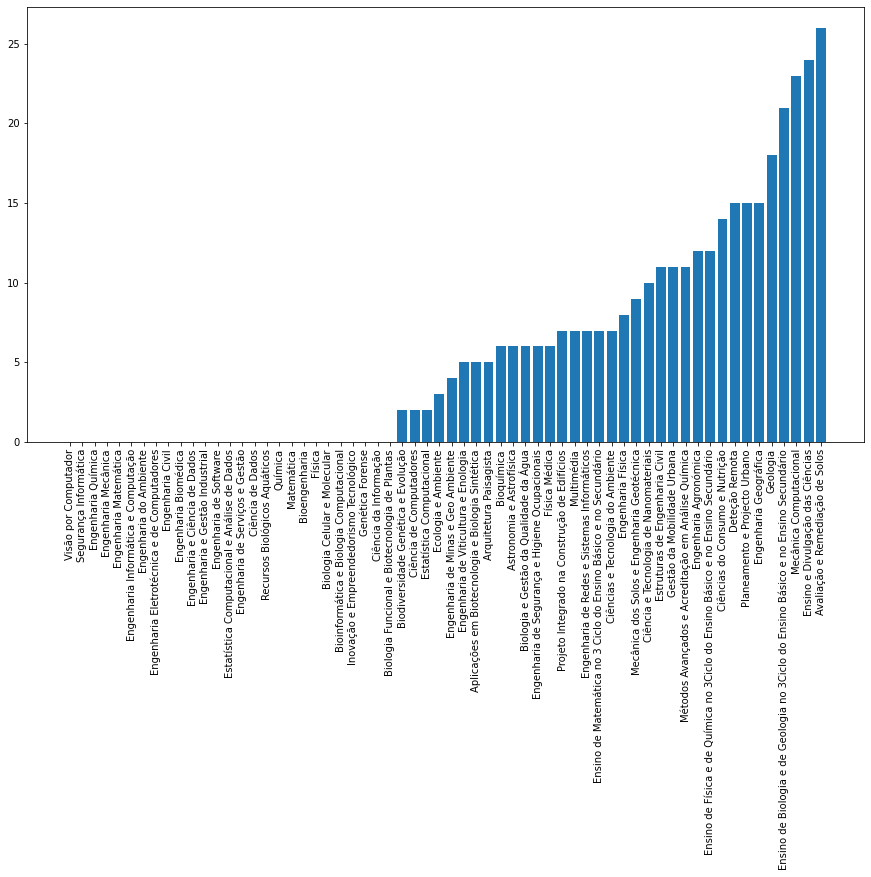

In [155]:
plt.figure(figsize=(15,8))
plt.bar(Sobrantes_df.index, Sobrantes_df['Sobrantes'])
plt.xticks(rotation=90)
# plt.show()
# plt.subplots_adjust(bottom=0.8)
# plt.savefig('./static/images/new_plot.png',bbox_inches='tight', pad_inches = 10)
plt.savefig('./static/images/new_plot.png',bbox_inches='tight')


# Minha análise ---------

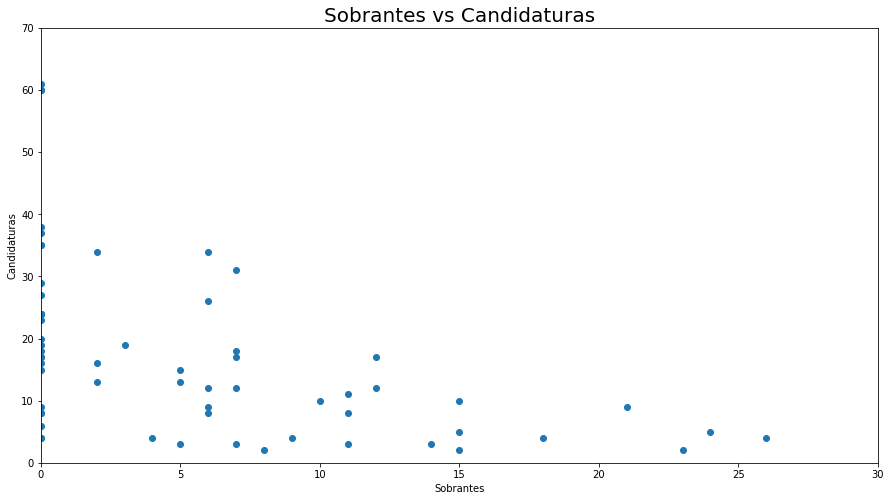

In [19]:
plt.figure(figsize=(15,8))
plt.title('Sobrantes vs Candidaturas', fontsize= 20)

plt.scatter(Sobrantes_df['Sobrantes'], Sobrantes_df['Candidaturas'])
plt.xlim(0,30)
plt.ylim(0,70)

plt.xlabel('Sobrantes')
plt.ylabel('Candidaturas')
plt.show()

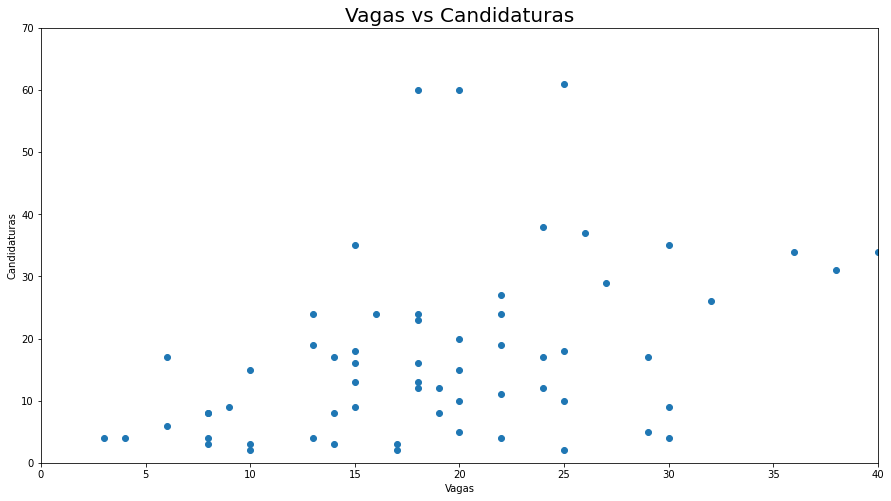

In [49]:
plt.figure(figsize=(15,8))
plt.title('Vagas vs Candidaturas', fontsize= 20)

plt.scatter(Sobrantes_df['Vagas'], Sobrantes_df['Candidaturas'])
plt.xlim(0,40)
plt.ylim(0,70)

plt.xlabel('Vagas')
plt.ylabel('Candidaturas')

plt.show()

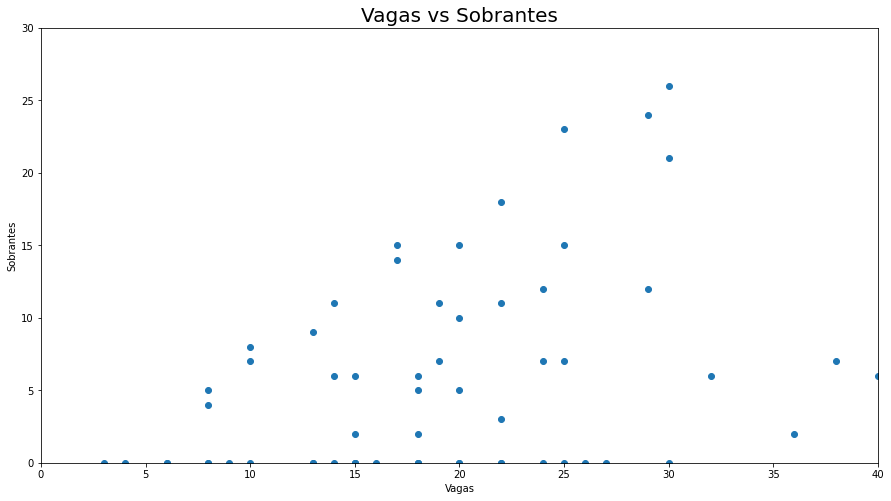

In [50]:
plt.figure(figsize=(15,8))
plt.title('Vagas vs Sobrantes', fontsize= 20)

plt.scatter(Sobrantes_df['Vagas'], Sobrantes_df['Sobrantes'])
plt.xlim(0,40)
plt.ylim(0,30)

plt.xlabel('Vagas')
plt.ylabel('Sobrantes')

plt.show()

In [51]:
Colocados_e = ['Ricardo Gonçalves de Andrade', 'Juliana Filipa Barbosa Nunes', 'Mafalda Inês Teixeira Oliveira', 'Andreia Lúcia Martins Batista', 'Paulo Daniel de Oliveira Ferreira', 'Tiago Daniel de Sousa Ferreira', 'José Carlos Pereira Moreira']

N_Colocados_e = ['Bruno Filipe Ferreira Assunção Oliveira', 'Maria Pedroso da Silva','João Jesus Figueiredo', 'José Gil Faria Dias', 'Alex dos Santos Magalhães','Xavier Branco Ribeiro', 'João Tiago Moreira Ferreira da Mota' ,'João Pedro da Costa Sousa']

Mestrados_FCUP = ['Aplicações_em_Biotecnologia_e_Biologia_Sintética','Arquitetura_Paisagista','Astronomia_e_Astrofísica','Avaliação_e_Remediação_de_Solos','Biodiversidade_Genética_e_Evolução', 'Bioinformática_e_Biologia_Computacional', 'Biologia_Celular_e_Molecular', 'Biologia_e_Gestão_da_Qualidade_da_Água', 'Biologia_Funcional_e_Biotecnologia_de_Plantas', 'Bioquímica','Ciência_de_Computadores','Ciência_de_Dados','Ciência_e_Tecnologia_de_Nanomateriais','Ciências_do_Consumo_e_Nutrição','Ciências_e_Tecnologia_do_Ambiente','Deteção_Remota','Ecologia_e_Ambiente','Engenharia_Agronómica','Engenharia_de_Redes_e_Sistemas_Informáticos','Engenharia_de_Viticultura_e_Enologia','Engenharia_Física','Engenharia_Geográfica','Engenharia_Matemática','Ensino_de_Biologia_e_de_Geologia_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Física_e_de_Química_no_3Ciclo_do_Ensino_Básico_e_no_Ensino_Secundário','Ensino_de_Matemática_no_3_Ciclo_do_Ensino_Básico_e_no_Secundário','Ensino_e_Divulgação_das_Ciências','Física','Física_Médica','Genética_Forense','Geologia','Matemática','Métodos_Avançados_e_Acreditação_em_Análise_Química','Química','Recursos_Biológicos_Aquáticos','Segurança_Informática','Estatística_Computacional','Estatística_Computacional_e_Análise_de_Dados']
Mestrados_Engenharia = ['Bioengenharia','Ciência_da_Informação','Engenharia_Biomédica','Engenharia_Civil','Engenharia_de_Minas_e_Geo_Ambiente','Engenharia_de_Segurança_e_Higiene_Ocupacionais','Engenharia_de_Serviços_e_Gestão','Engenharia_de_Software','Engenharia_do_Ambiente','Engenharia_e_Ciência_de_Dados', 'Engenharia_e_Gestão_Industrial', 'Engenharia_Eletrotécnica_e_de_Computadores', 'Engenharia_Informática_e_Computação', 'Engenharia_Mecânica', 'Engenharia_Química', 'Estruturas_de_Engenharia_Civil', 'Gestão_da_Mobilidade_Urbana', 'Inovação_e_Empreendedorismo_Tecnológico', 'Mecânica_Computacional', 'Mecânica_dos_Solos_e_Engenharia_Geotécnica', 'Multimédia', 'Planeamento_e_Projecto_Urbano', 'Projeto_Integrado_na_Construção_de_Edifícios', 'Visão_por_Computador']
Mestrados = Mestrados_FCUP + Mestrados_Engenharia
Mestrados.sort()

#Escolher a pessoa a ver
Nome = Colocados_e + N_Colocados_e

for j in Nome:
    
    for i in Mestrados:

        if j in N_Colocados_df[i].dropna().tolist():        
            print(j, 'candidatou-se a', i, 'mas não ficou colocado')

        if j in Colocados_df[i].dropna().tolist():       
            print(j, 'candidatou-se a', i, 'e ficou colocado')
    print('')

Ricardo Gonçalves de Andrade candidatou-se a Ciência_de_Dados e ficou colocado
Ricardo Gonçalves de Andrade candidatou-se a Engenharia_Matemática e ficou colocado
Ricardo Gonçalves de Andrade candidatou-se a Estatística_Computacional_e_Análise_de_Dados e ficou colocado

Juliana Filipa Barbosa Nunes candidatou-se a Ciência_de_Dados e ficou colocado
Juliana Filipa Barbosa Nunes candidatou-se a Engenharia_Matemática e ficou colocado
Juliana Filipa Barbosa Nunes candidatou-se a Estatística_Computacional_e_Análise_de_Dados e ficou colocado

Mafalda Inês Teixeira Oliveira candidatou-se a Engenharia_Matemática e ficou colocado
Mafalda Inês Teixeira Oliveira candidatou-se a Estatística_Computacional_e_Análise_de_Dados e ficou colocado

Andreia Lúcia Martins Batista candidatou-se a Engenharia_Matemática e ficou colocado
Andreia Lúcia Martins Batista candidatou-se a Estatística_Computacional_e_Análise_de_Dados e ficou colocado

Paulo Daniel de Oliveira Ferreira candidatou-se a Estatística_Comput

In [52]:
print('\'Mafalda Inês Teixeira Oliveira\' e \'Paulo Daniel de Oliveira Ferreira\'')
print('já se increveram em Estatística_Computacional_e_Análise_de_Dados')
print('\'João Jesus Figueiredo\' já se inscreveu em Engenharia_Matemática')

'Mafalda Inês Teixeira Oliveira' e 'Paulo Daniel de Oliveira Ferreira'
já se increveram em Estatística_Computacional_e_Análise_de_Dados
'João Jesus Figueiredo' já se inscreveu em Engenharia_Matemática


In [53]:
d["df_3_Estatística_Computacional_e_Análise_de_Dados"]

,Nomes dos candidatos
Nº de ordem,
16º,Maria Pedroso da Silva
17º,Xavier Branco Ribeiro
18º,João Pedro da Costa Sousa
19º,José Gabriel Moreira Pinto
20º,Heitor Salustiano Lira
21º,José Gil Faria Dias
22º,João Jesus Figueiredo
23º,Maria Francisca Moreira de Barros
24º,Alex dos Santos Magalhães


In [166]:
# Mestrados
for product in Mestrados:
        print(product)

Aplicações_em_Biotecnologia_e_Biologia_Sintética
Arquitetura_Paisagista
Astronomia_e_Astrofísica
Avaliação_e_Remediação_de_Solos
Biodiversidade_Genética_e_Evolução
Bioengenharia
Bioinformática_e_Biologia_Computacional
Biologia_Celular_e_Molecular
Biologia_Funcional_e_Biotecnologia_de_Plantas
Biologia_e_Gestão_da_Qualidade_da_Água
Bioquímica
Ciência_da_Informação
Ciência_de_Computadores
Ciência_de_Dados
Ciência_e_Tecnologia_de_Nanomateriais
Ciências_do_Consumo_e_Nutrição
Ciências_e_Tecnologia_do_Ambiente
Deteção_Remota
Ecologia_e_Ambiente
Engenharia_Agronómica
Engenharia_Biomédica
Engenharia_Civil
Engenharia_Eletrotécnica_e_de_Computadores
Engenharia_Física
Engenharia_Geográfica
Engenharia_Informática_e_Computação
Engenharia_Matemática
Engenharia_Mecânica
Engenharia_Química
Engenharia_de_Minas_e_Geo_Ambiente
Engenharia_de_Redes_e_Sistemas_Informáticos
Engenharia_de_Segurança_e_Higiene_Ocupacionais
Engenharia_de_Serviços_e_Gestão
Engenharia_de_Software
Engenharia_de_Viticultura_e_Enologi